#1. Pandas Profiling Report

First, we will use the Pandas Profiling method to create a profilig report, but we need to install the newer version of it.



Running this command may or may not ask you to restart the runtime, but if it does, do restart it.

In [ ]:
#import necessary modules
import numpy as np
import pandas as pd

In [ ]:
#Read the csv file
df = pd.read_csv("train.csv")

**Now you can download that profiling report and view it on your browser**

In [ ]:
#Description of entire dataset
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [ ]:
df.shape

(1460, 81)

In [ ]:
#Top n rows of the dataset
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

#2. Feature Selection

This is a method in Data Sciences in which we select the features which have the most impact on our dependant variable.

Learn more in detail here : [Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

**We are targeting the "SalePrice" column which is the dependant variable in our case.**

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

These are the total null values in each of our 81 variables, you can check the top or bottom few by using the *head()* or *tail()*  methods.

In [ ]:
#Get top 5 variables with highest number of null values
df.isnull().sum().nlargest(5)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

Top 4 features have more than half of the values missing, means they don't affect our dependant variable as much as the others, so it's safe to drop them. It will increase our training speed and will also help our model learn better, but first we will look into a few other Feature Selection methods and techniques.

##1. Filter Method

In this technique we filter features based on their correlation with the output/dependant variable. We will use the Pearson correlation built in Pandas.

---



The correlation coefficient has values between -1 to 1

— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

— A value closer to 1 implies stronger positive correlation

— A value closer to -1 implies stronger negative correlation


---

Here we will first plot the Pearson correlation heatmap using Seaborn library's heatmap and see the correlation of independent variables with the output variable *SalePrice*.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation of all features with the SalePrice Column
df[df.columns[1:]].corr()['SalePrice'][:]

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [ ]:
#Correlation with output variable
cor_target = abs(cor["SalePrice"])

#Selecting highly correlated features, who have correlation coefficient of greater than or equal to 0
relevant_features = cor_target[cor_target>=0]
relevant_features

Id               0.021917
MSSubClass       0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond      0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2       0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF     0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath     0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch    0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal          0.021190
MoSold           0.046432
YrSold           0.028923
SalePrice        1.000000
Name: SalePr

In [ ]:
#Selecting lesser correlated features, with correlation coefficient of lesser than 0.3
irrelevant_features = cor_target[cor_target<0.3]
irrelevant_features

Id               0.021917
MSSubClass       0.084284
LotArea          0.263843
OverallCond      0.077856
BsmtFinSF2       0.011378
BsmtUnfSF        0.214479
LowQualFinSF     0.025606
BsmtFullBath     0.227122
BsmtHalfBath     0.016844
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal          0.021190
MoSold           0.046432
YrSold           0.028923
Name: SalePrice, dtype: float64

See, correlation is telling us that there are many features who don't impact our target variable s0 much, so Feature Selection based on null values isn't enough, but there is another Feature Selection technique we can use.

##2. Wrapper Method using Backward Elimination

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

---

In Backward Elimination, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

To be able to train our model we need to do the following things :

1.   Drop the features with least correlation coefficients and null values.
2.   Fill the missing values in selected features with mode(the most frequently occuring value) in categorical columns and mean(average of all values) in numerical columns.
3.   Convert categorical columns into numerical ones using *.cat.codes* method from Pandas which simply returns the values with their indexes.



In [ ]:
#Dropping features with most null values and least correlation coefficients.
final_df = df.drop(['Fence', 'MiscFeature','PoolQC','FireplaceQu','LotFrontage','Alley'], axis=1)

In [ ]:
#Filling null values in remaining features
final_df['MSZoning']=final_df['MSZoning'].fillna(final_df['MSZoning'].mode()[0])
final_df['Utilities']=final_df['Utilities'].fillna(final_df['Utilities'].mode()[0])
final_df['Exterior1st']=final_df['Exterior1st'].fillna(final_df['Exterior1st'].mode()[0])
final_df['Exterior2nd']=final_df['Exterior2nd'].fillna(final_df['Exterior2nd'].mode()[0])
final_df['BsmtFinSF1']=final_df['BsmtFinSF1'].fillna(final_df['BsmtFinSF1'].mean())
final_df['BsmtFinSF2']=final_df['BsmtFinSF2'].fillna(final_df['BsmtFinSF2'].mean())
final_df['BsmtUnfSF']=final_df['BsmtUnfSF'].fillna(final_df['BsmtUnfSF'].mean())
final_df['TotalBsmtSF']=final_df['TotalBsmtSF'].fillna(final_df['TotalBsmtSF'].mean())
final_df['BsmtFullBath']=final_df['BsmtFullBath'].fillna(final_df['BsmtFullBath'].mean())
final_df['BsmtHalfBath']=final_df['BsmtHalfBath'].fillna(final_df['BsmtHalfBath'].mean())
final_df['KitchenQual']=final_df['KitchenQual'].fillna(final_df['KitchenQual'].mode()[0])
final_df['Functional']=final_df['Functional'].fillna(final_df['Functional'].mode()[0])
final_df['GarageCars']=final_df['GarageCars'].fillna(final_df['GarageCars'].mean())
final_df['GarageArea']=final_df['GarageArea'].fillna(final_df['GarageArea'].mean())
final_df['SaleType']=final_df['SaleType'].fillna(final_df['SaleType'].mode()[0])
final_df['BsmtQual']=final_df['BsmtQual'].fillna(final_df['BsmtQual'].mode()[0])
final_df['Electrical']=final_df['Electrical'].fillna(final_df['Electrical'].mode()[0])
final_df['BsmtCond']=final_df['BsmtCond'].fillna(final_df['BsmtCond'].mode()[0])
final_df['BsmtExposure']=final_df['BsmtExposure'].fillna(final_df['BsmtExposure'].mode()[0])
final_df['BsmtFinType1']=final_df['BsmtFinType1'].fillna(final_df['BsmtFinType1'].mode()[0])
final_df['BsmtFinType2']=final_df['BsmtFinType2'].fillna(final_df['BsmtFinType2'].mode()[0])
final_df['MasVnrArea']=final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].mean())
final_df['MasVnrType']=final_df['MasVnrType'].fillna(final_df['MasVnrType'].mode()[0])
final_df['GarageType']=final_df['GarageType'].fillna(final_df['GarageType'].mode()[0])
final_df['GarageYrBlt']=final_df['GarageYrBlt'].fillna(final_df['GarageYrBlt'].mean())
final_df['GarageFinish']=final_df['GarageFinish'].fillna(final_df['GarageFinish'].mode()[0])
final_df['GarageQual']=final_df['GarageQual'].fillna(final_df['GarageQual'].mode()[0])
final_df['GarageCond']=final_df['GarageCond'].fillna(final_df['GarageCond'].mode()[0])

In [ ]:
final_df.shape

(1460, 75)

In [ ]:
#Popping out the ID column as its not used for training the model
popped_col = final_df.pop('Id')

In [ ]:
#Converting categorical columns to numerical
for col_name in final_df.columns:
    if(final_df[col_name].dtype == 'object'):
        final_df[col_name]= final_df[col_name].astype('category')
        final_df[col_name] = final_df[col_name].cat.codes

for col_name in final_df.columns:
    if(final_df[col_name].dtype == 'str'):
        final_df[col_name]= final_df[col_name].astype('category')
        final_df[col_name] = final_df[col_name].cat.codes  

In [ ]:
#Seperating our data set into dependant and independant variables

X = final_df.drop("SalePrice",1)   #Feature Matrix
y = final_df["SalePrice"]          #Target Variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X.shape

(1460, 73)

In [ ]:
#Using a statsmodel to find out the pvalues
import statsmodels.api as sm

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1.astype(float)).fit()

#The lower the p value, the better
model.pvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const            0.139469
MSSubClass       0.008894
MSZoning         0.514386
LotArea          0.000770
Street           0.038084
                   ...   
MiscVal          0.756056
MoSold           0.576590
YrSold           0.070269
SaleType         0.343033
SaleCondition    0.002684
Length: 74, dtype: float64

In [ ]:
#Total number of pvalues
model.pvalues.count()

74

In [ ]:
#Top 20 features with largest pvalues
model.pvalues.nlargest(20)

GarageFinish     0.998617
HalfBath         0.960903
GarageQual       0.949036
GarageType       0.863644
CentralAir       0.846317
GarageYrBlt      0.801358
LotConfig        0.793923
MiscVal          0.756056
BsmtHalfBath     0.737031
EnclosedPorch    0.729414
ExterCond        0.720414
Electrical       0.658082
PavedDrive       0.630084
BsmtFinType2     0.613091
LowQualFinSF     0.577799
MoSold           0.576590
GarageArea       0.564959
YearRemodAdd     0.540060
Condition1       0.536791
Exterior2nd      0.534238
dtype: float64

In [ ]:
#Bottom 10 features with smallest pvalues
model.pvalues.nsmallest(10)

OverallQual     1.048785e-20
BsmtQual        8.831079e-10
KitchenQual     1.347972e-09
GrLivArea       2.236265e-07
MasVnrArea      2.277047e-07
ExterQual       4.080290e-06
OverallCond     1.139581e-05
Functional      1.620891e-05
BsmtExposure    2.937483e-05
GarageCars      9.723728e-05
dtype: float64

In [ ]:
#Converting them into numpy array so we can view them without scientific notation
np.set_printoptions(suppress=True)
model.pvalues.nsmallest(35).to_numpy()

array([0.        , 0.        , 0.        , 0.00000022, 0.00000023,
       0.00000408, 0.0000114 , 0.00001621, 0.00002937, 0.00009724,
       0.0007697 , 0.00081191, 0.00151557, 0.00265661, 0.00268434,
       0.00281467, 0.00284813, 0.0030879 , 0.00522445, 0.00537494,
       0.00591659, 0.00889435, 0.01239522, 0.01274283, 0.01424899,
       0.01572483, 0.01785743, 0.01955068, 0.03808427, 0.04163463,
       0.04583348, 0.06663602, 0.07026938, 0.09924521, 0.09947368])

Usually the approach is to remove the feature with the highest pvalue and build the model again. This is an iterative process and is repeated untill all the features with pvalues higher than some specific value are removed. Usually that pvalue is set to 0.05. Let's implement this using a loop.

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['MSSubClass', 'LotArea', 'Street', 'LandContour', 'Neighborhood', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']


In [ ]:
len(selected_features_BE)

32

**So, out of the 74 p-values, only 32 are higher than the standard 0.05 value. If we drop the rest, there will be a significant data loss and our models might not be able to learn well. So it's upto us to decide the standard value, maybe lower it even further to the point where we dont lose a lot of features.**

##3. Final Feature Selection

Features PoolQC, Alley, MiscFeature and Fence have more than 1000 missing values so they neither give us much information no do they impact our dataset much. So we will be dropping these features without second thoughts.

The results of our Backwards Elimination and Filter method based on correlation has shown us that there are other less relevant features as well but those features don't have any null values so we won't be dropping any other features.

In [ ]:
df = df.drop(['Fence', 'MiscFeature','PoolQC','Alley'], axis=1)

In [ ]:
df.shape

(1460, 77)

4 features have been dropped, so our dataset's dimension has been reduced.

In [ ]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


As our ID column is not a features, instead just an identifier, so we will pop it out as well.

In [ ]:
Id_column = df.pop("Id")

In [ ]:
df.shape

(1460, 76)

One more column has been popped out, reducing our dataset's dimensions again.

In [ ]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Now we are left with only our features and target variable, but notice there are categorical features as well and as a Machine Learning Engineer, you must know that ML models only take numbers as input, so we need to convert our Categorical Features into numerical ones and handle the missing values as well, that's what we will do in data preprocessing Module.

#3. Data Preprocessing

Data preprocessing is final stage before modeling, in this, you prepare your selected dataset for training and evaluation.

##1. Seperating Numerical and Categorical columns.

In [ ]:
#Popping out the Target Variable so we are only left with features.
SalePrice_column = df.pop("SalePrice")

In [ ]:
df.shape

(1460, 75)

One more column has been popped out, Good.....!!!!!

In [ ]:
# Save all categorical columns in list
categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object']

# Dataframe with categorical features
data_cat = df[categorical_columns]
# Dataframe with numerical features
data_num = df.drop(categorical_columns, axis=1)

In [ ]:
data_cat.shape, data_num.shape

((1460, 39), (1460, 36))

There are 39 categorical and 36 numerical columns.

In [ ]:
data_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
data_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


##2. Handling missing values.

In [ ]:
data_cat.isnull().sum().nlargest(15)

FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
MSZoning          0
Street            0
LotShape          0
dtype: int64

In [ ]:
data_num.isnull().sum().nlargest(5)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MSSubClass       0
LotArea          0
dtype: int64

Categorical Features have more missing values than numerical ones.

Let's first handle missing values in numerical features, every numerical column has an average or in statistical terms, a mean value.

In [ ]:
data_num['LotFrontage'].mean()

70.04995836802665

We can fill the missing values with the mean in numerical columns. For the stat model we did it for every column, but let's write a loop and save ourselves some time doing it in far lesser lines of code.

In [ ]:
data_len = data_num.shape[0]

# Check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100))
    print("Filling missing values with mean in column: {}".format(col))
    data_num[col] = data_num[col].fillna(data_num[col].mean())
    print("------------------------")

MSSubClass - missing values: 0 (0.00%)
Filling missing values with mean in column: MSSubClass
------------------------
LotFrontage - missing values: 259 (17.74%)
Filling missing values with mean in column: LotFrontage
------------------------
LotArea - missing values: 0 (0.00%)
Filling missing values with mean in column: LotArea
------------------------
OverallQual - missing values: 0 (0.00%)
Filling missing values with mean in column: OverallQual
------------------------
OverallCond - missing values: 0 (0.00%)
Filling missing values with mean in column: OverallCond
------------------------
YearBuilt - missing values: 0 (0.00%)
Filling missing values with mean in column: YearBuilt
------------------------
YearRemodAdd - missing values: 0 (0.00%)
Filling missing values with mean in column: YearRemodAdd
------------------------
MasVnrArea - missing values: 8 (0.55%)
Filling missing values with mean in column: MasVnrArea
------------------------
BsmtFinSF1 - missing values: 0 (0.00%)
Fill

Let's check if there are any remaining missing values in our numerical dataset.

In [ ]:
data_num.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

So we have taken care of the missing values in our numerical dataset using mean, what about the categorical dataset.

Every column has one or more most frequently occuring value, which is called mode in stats. We can fill missing values in categorical dataset using mode but it will be better if we just assign them a "None" value for the time being.

In [ ]:
data_cat = data_cat.fillna("None")

In [ ]:
data_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

Good, now there aren't any missing values in our numerical dataset as well, but remember our models need numerical data to train, so we need to convert categorical columns into numerical ones as well.

##3. Catcoding categorical dataset.

Pandas catcoding is basically indexing in essence. It assigns one index to all the unique values in a categorical column so it can be trained.

Let's look at all unique values in our columns.

In [ ]:
#All unique values in MSZoning column.
data_cat.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
#Number of unique values in MSZoning column.
len(data_cat.MSZoning.unique())

5

In [ ]:
#All unique values in FireplaceQu column.
data_cat.FireplaceQu.unique()

array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

See, there are also None values in this column, because we filled the missing values here with None.

In [ ]:
#Number of unique values in FireplaceQu column.
len(data_cat.FireplaceQu.unique())

6

So Pandas categorical coding will use 5 indexes in MSZoning column, 6 in FireplaceQu and so on.

There is another way of converting Categorical features to numerical ones called "One Hot Encoding", which creates new columns for every unique categorical feature. It can also be done with Pandas but we have a seperate Test dataset as well so we will stick to this approach.

Bear in mind that both Catcoding and one hot encoding yield same results, there isn't much difference but as one hot encoding creates new columns, it might be computationally expensive.

In [ ]:
#Viewing our categorical dataset again.
data_cat.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
#Converting categorical columns to numerical
for col_name in data_cat.columns:
    if(data_cat[col_name].dtype == 'object'):
        data_cat[col_name]= data_cat[col_name].astype('category')
        data_cat[col_name] = data_cat[col_name].cat.codes

for col_name in data_cat.columns:
    if(data_cat[col_name].dtype == 'str'):
        data_cat[col_name]= data_cat[col_name].astype('category')
        data_cat[col_name] = data_cat[col_name].cat.codes  

In [ ]:
data_cat.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,3,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,5,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,5,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,5,1,2,5,5,2,8,4


And Boooommmmm, our categorical dataset has been converted into Numerical one.

#4. Data Visualization.

Well, how about some visuals???

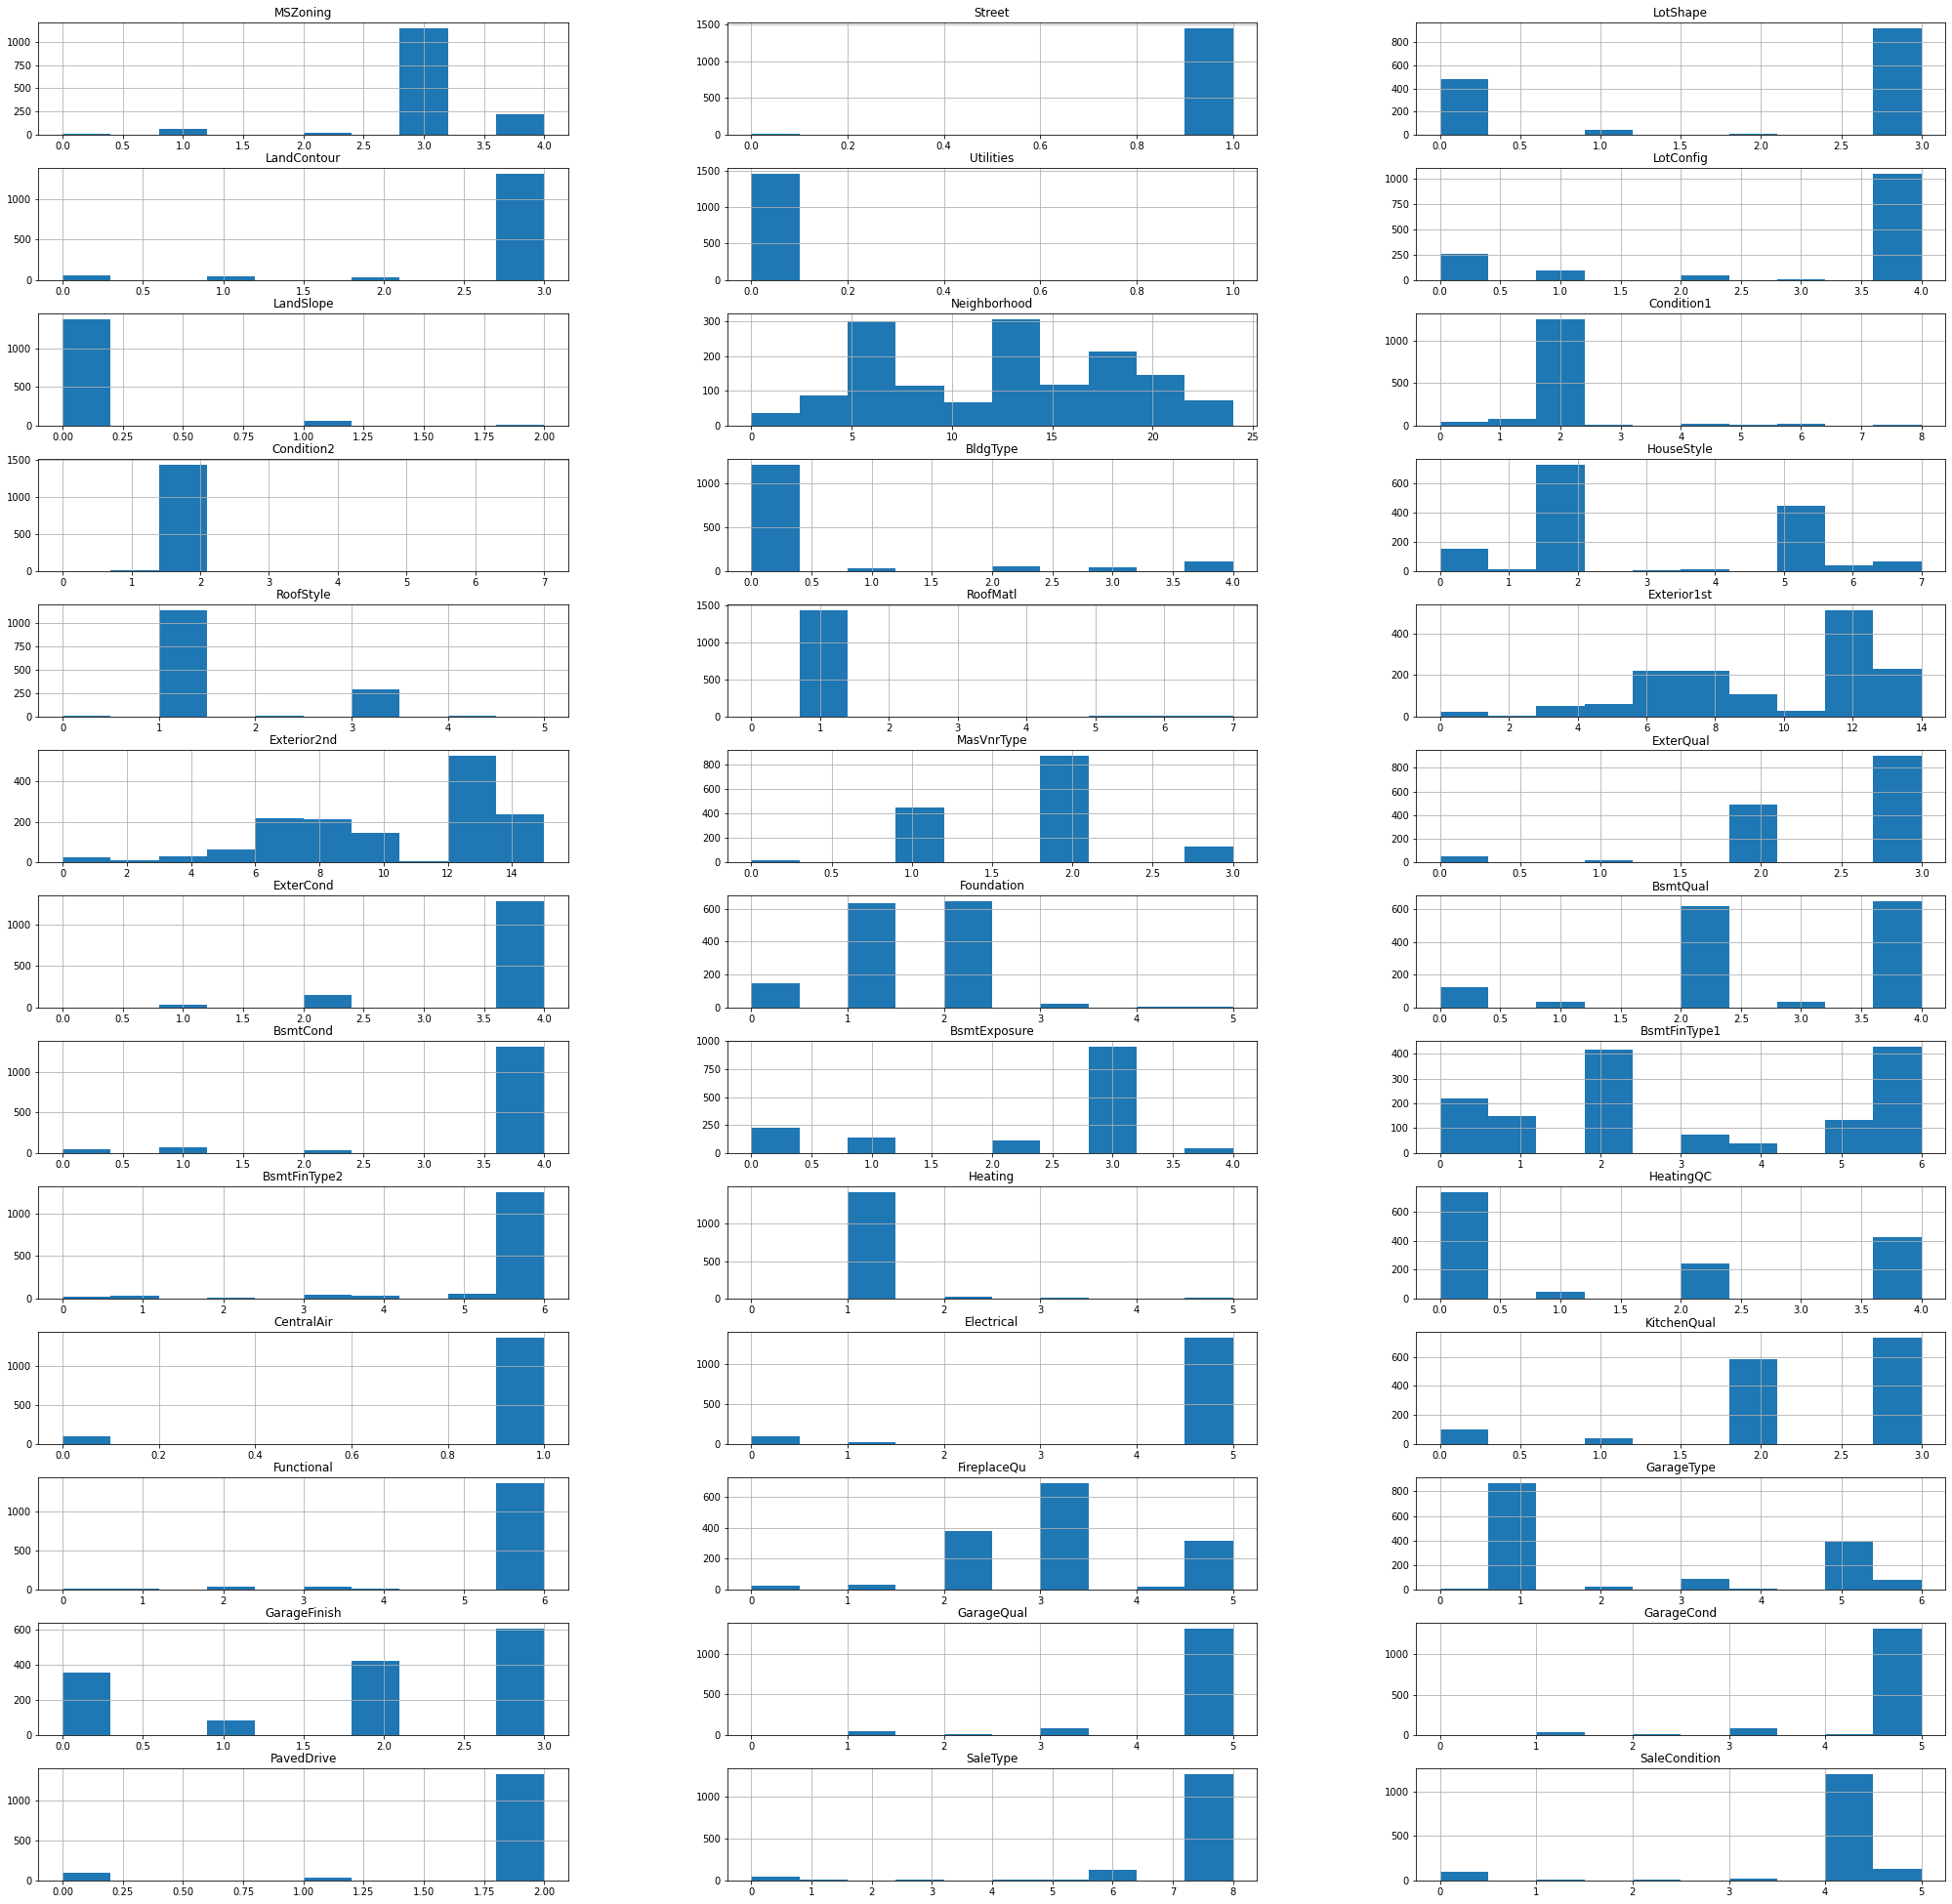

In [ ]:
#Visualizing the range of categorical columns
import matplotlib.pyplot as plt
%matplotlib inline
data_cat.hist(layout=(13,3), figsize=(35, 35))
plt.show()

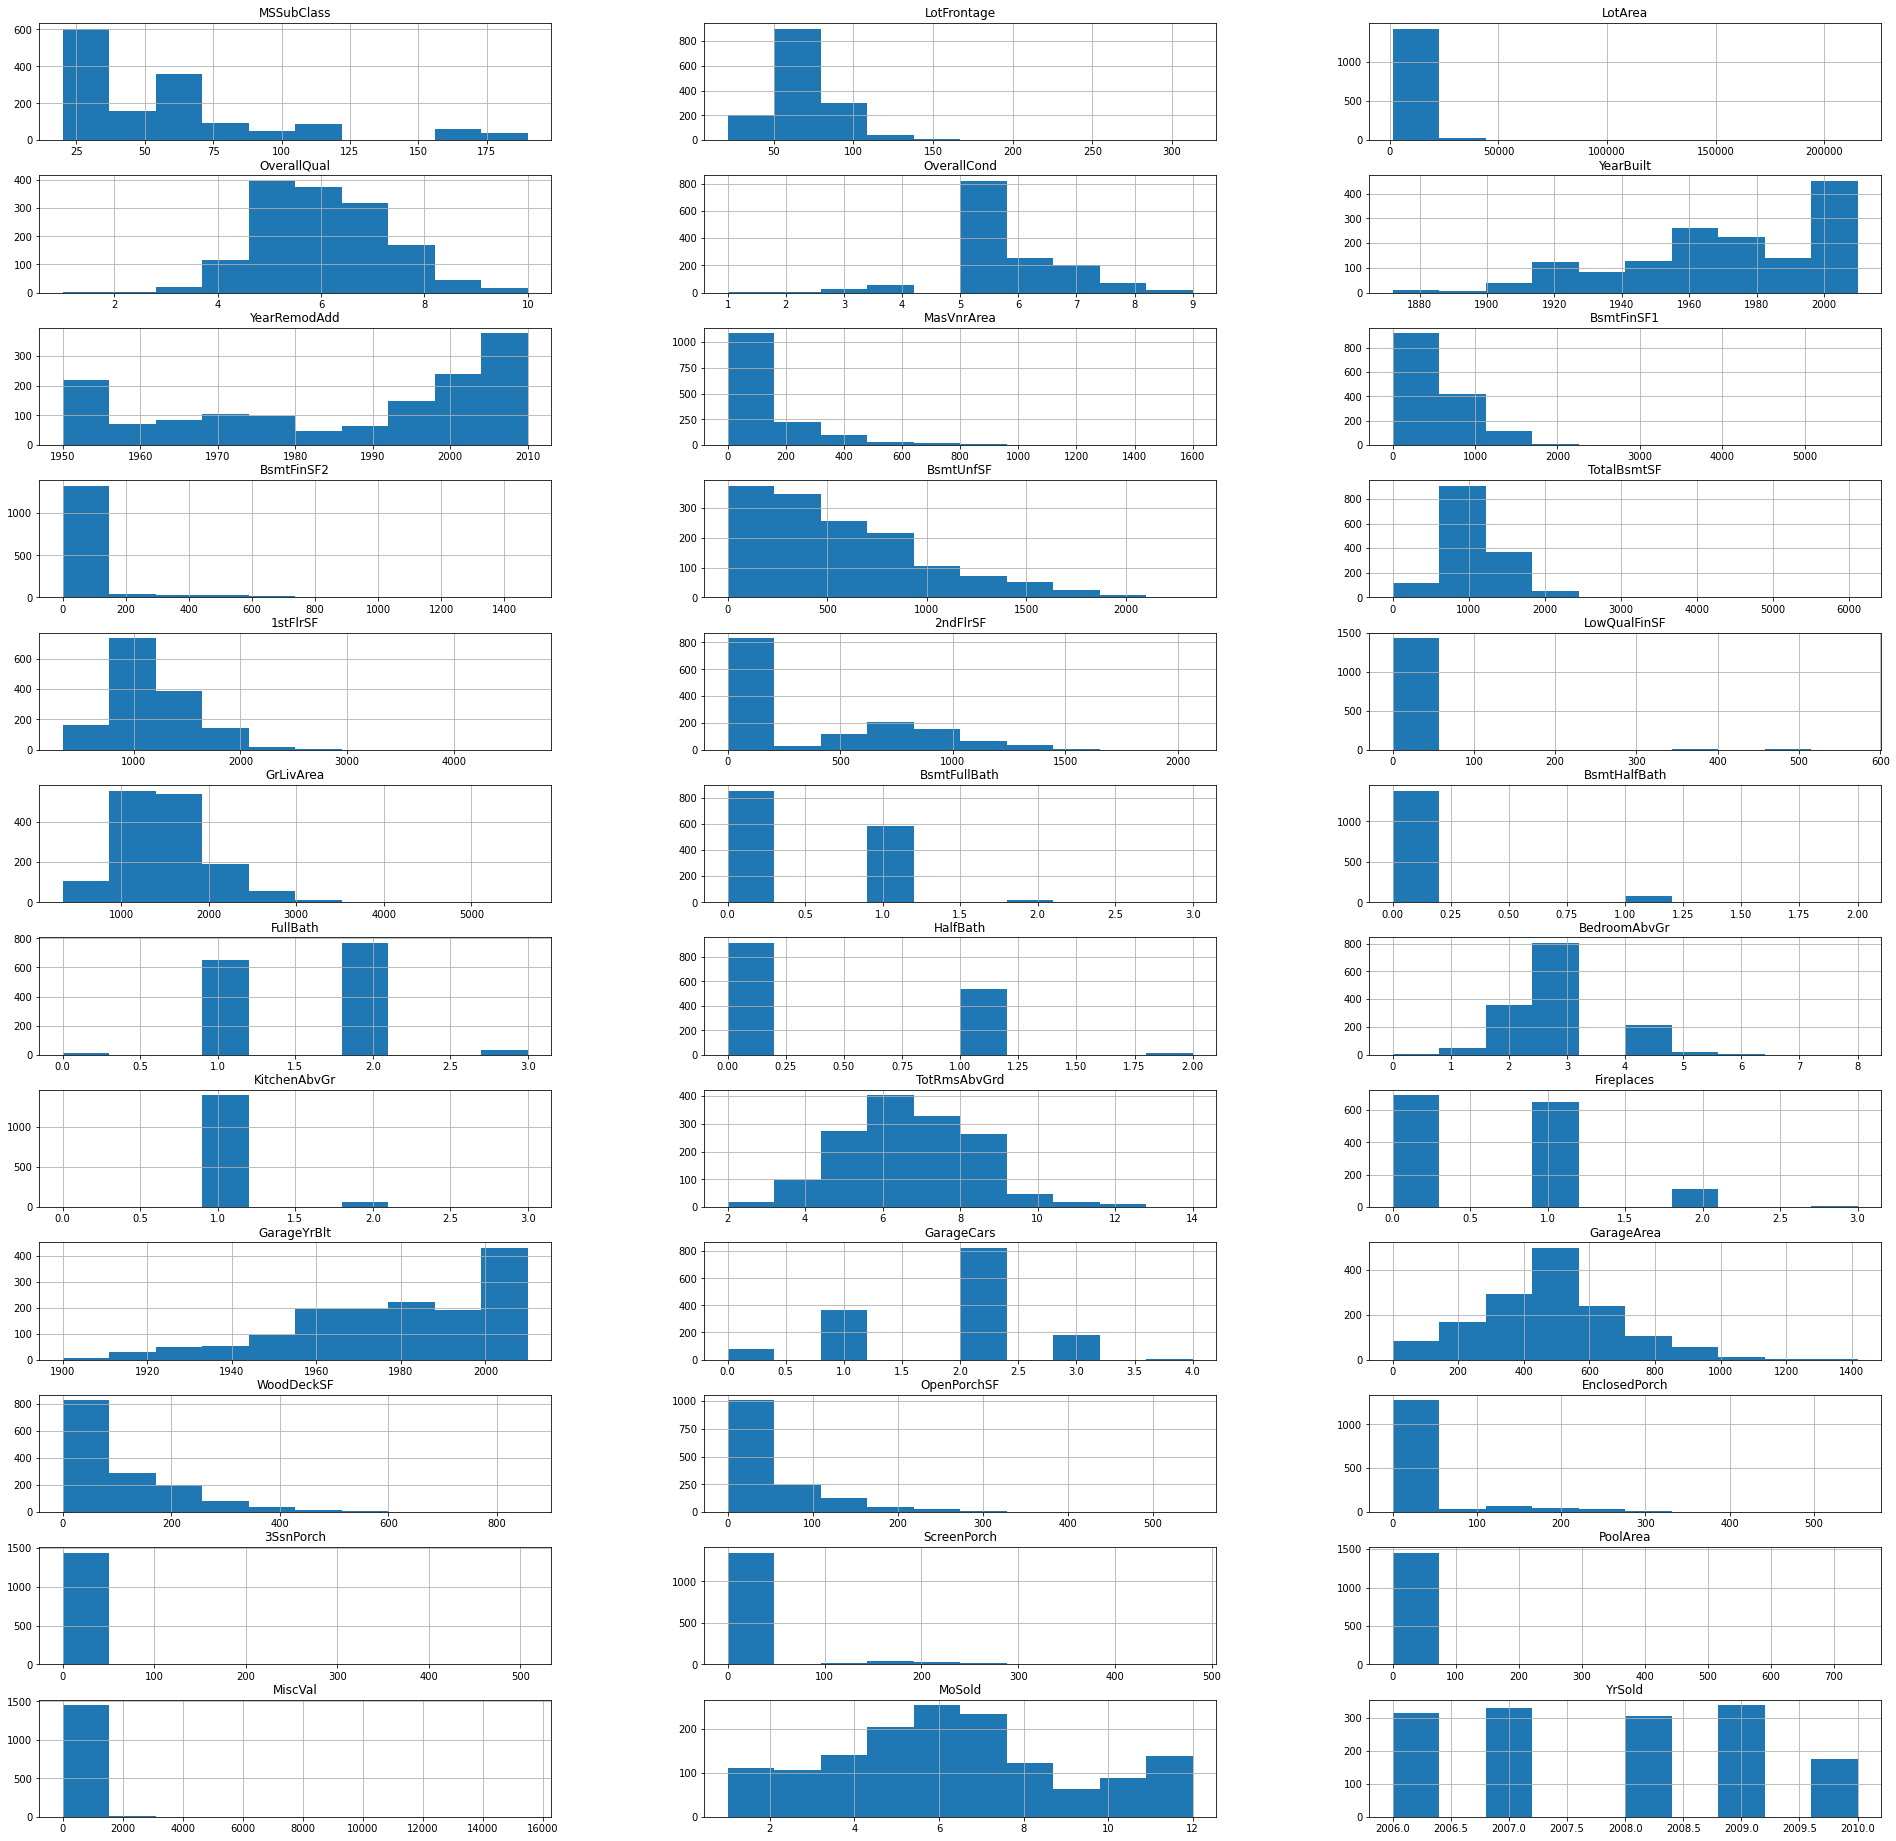

In [ ]:
#Visualizing the range of categorical columns
import matplotlib.pyplot as plt
%matplotlib inline
data_num.hist(layout=(12,3), figsize=(33, 33))
plt.show()

#5. Baseline Scikit Learn Linear Regression model.

In [ ]:
df = pd.concat([data_cat, data_num, SalePrice_column], axis=1)

In [ ]:
df.shape

(1460, 76)

In [ ]:
df.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,0,3,0,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,0,3,0,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,0,3,0,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,250000


Now we have the complete dataset again.

In [ ]:
#Seperating features and labels
X = df.iloc[:, :75].values
y = df.iloc[:, -1].values

In [ ]:
#Splittilng the data set into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [ ]:
#Fitting the set for linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicting the results for the test set
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
absolute_error = mean_absolute_error(y_test, y_pred)
absolute_error

21704.78721857384

In [ ]:
squared_error = mean_squared_error(y_test, y_pred)
squared_error

2288808695.074739

In [ ]:
df['SalePrice'].mean()

180921.19589041095

Average SalePrice of houses is around 180k while our baseline linear regression model has a mean absolute error of around 21k, means every prediction it made is off by an average of 21k.

This might seem a lot but if we make deep learning models with fully connected deep layers we will realize this score is very hard to come close to let alone beating it.

If you use linear regression model, you can tweak the dataset, maybe reduce skewness or drop another few less relevant features to obtain better results.

But we will finish this notebook here and download this dataset.

In [ ]:
df = pd.concat([Id_column, df], axis=1)

In [ ]:
df.shape

(1460, 77)

In [ ]:
df.head(5)

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,3,1,3,3,0,4,0,5,2,...,0,61,0,0,0,0,0,2,2008,208500
1,2,3,1,3,3,0,2,0,24,1,...,298,0,0,0,0,0,0,5,2007,181500
2,3,3,1,0,3,0,4,0,5,2,...,0,42,0,0,0,0,0,9,2008,223500
3,4,3,1,0,3,0,0,0,6,2,...,0,35,272,0,0,0,0,2,2006,140000
4,5,3,1,0,3,0,2,0,15,2,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df.to_csv('PreprocessedDataset.csv', index=False)

In [ ]:
files.download("PreprocessedDataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>